## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [1035]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import missingno as msno

warnings.filterwarnings("ignore")

%matplotlib inline

In [1036]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [1037]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Age
the total null values are: 226
the datatype is float64

TypeofContact
the total null values are: 25
the datatype is object

DurationOfPitch
the total null values are: 251
the datatype is float64

NumberOfFollowups
the total null values are: 45
the datatype is float64

PreferredPropertyStar
the total null values are: 26
the datatype is float64

NumberOfTrips
the total null values are: 140
the datatype is float64

NumberOfChildrenVisiting
the total null values are: 66
the datatype is float64

MonthlyIncome
the total null values are: 233
the datatype is float64



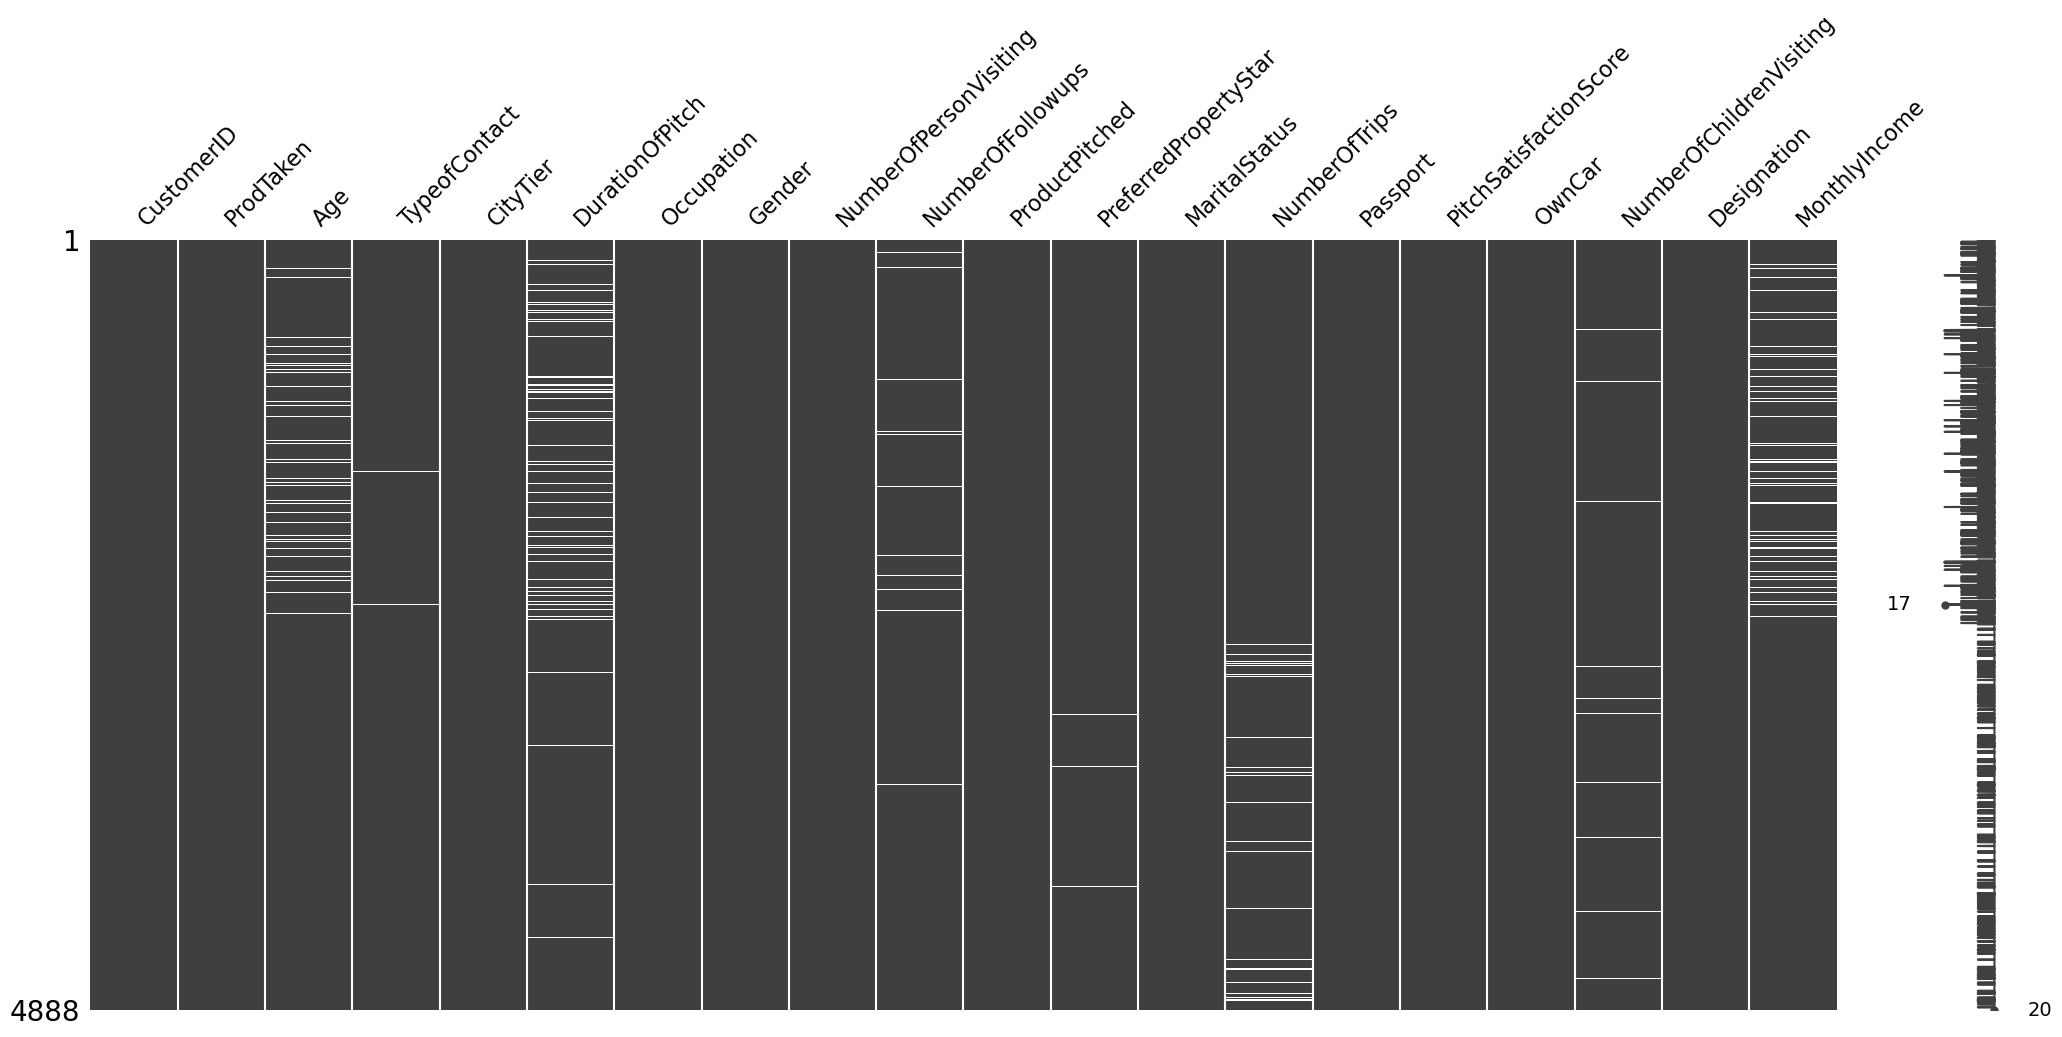

In [1038]:
# Columns containing missing values
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()
msno.matrix(df);

In [1039]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [1040]:
## get all the numeric features
# Creating two lists containing categorical and numerical variables
cat = []
num = []
for i in df.columns:
  if df[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)
print('categorical variables = ',cat)
print('numerical variables = ',num)

categorical variables =  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
numerical variables =  ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']


In [1041]:
### Check all the categories 
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [1042]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [1043]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [1044]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [1045]:
### Check all the categories 
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [1046]:
### Check all the categories 
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

### EDA

### Splitting data into numerical and categorical variables

In [1047]:
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

#### Distribution of the numerical data

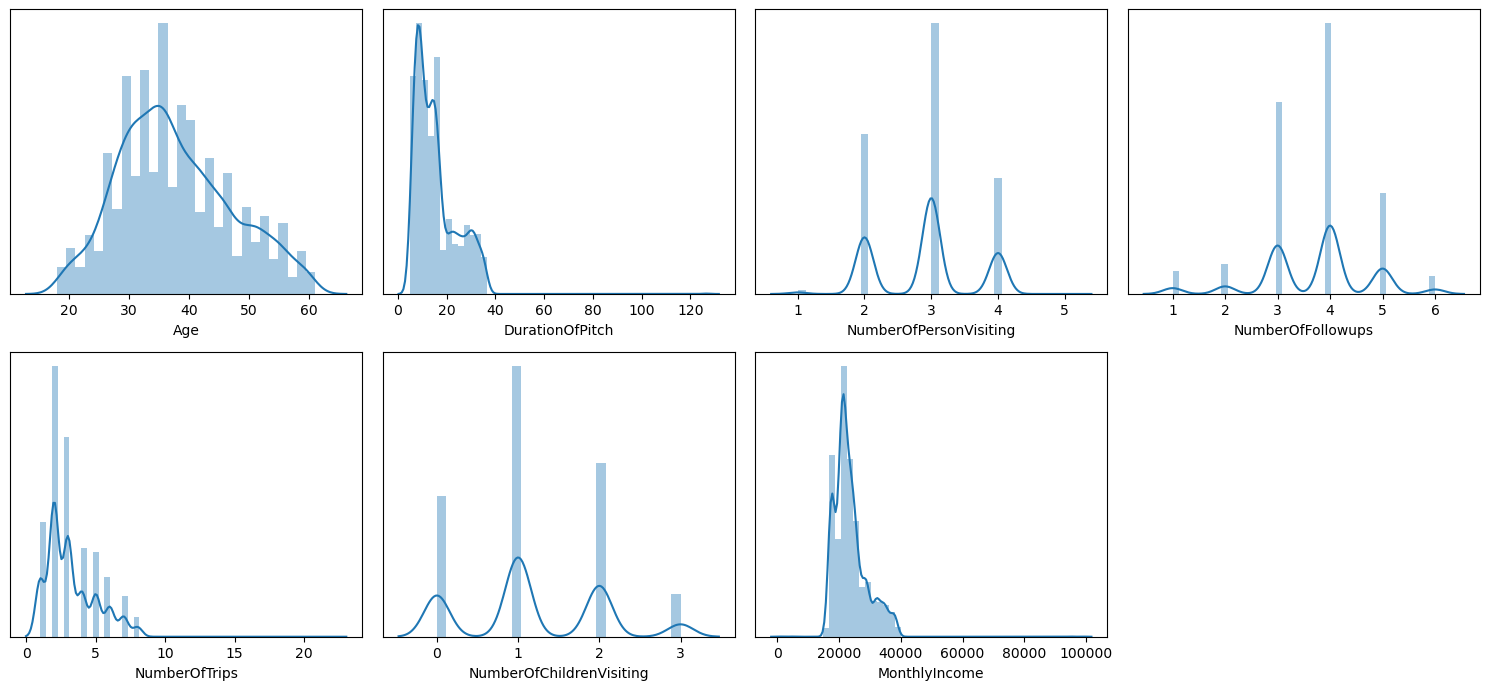

In [1048]:
plt.figure(figsize=(15,10))
for i in range(1, len(nums)):
    plt.subplot(3, 4, i)
    sns.distplot(df[nums[i]])
    plt.ylabel('')
    plt.yticks([])
    plt.tight_layout()

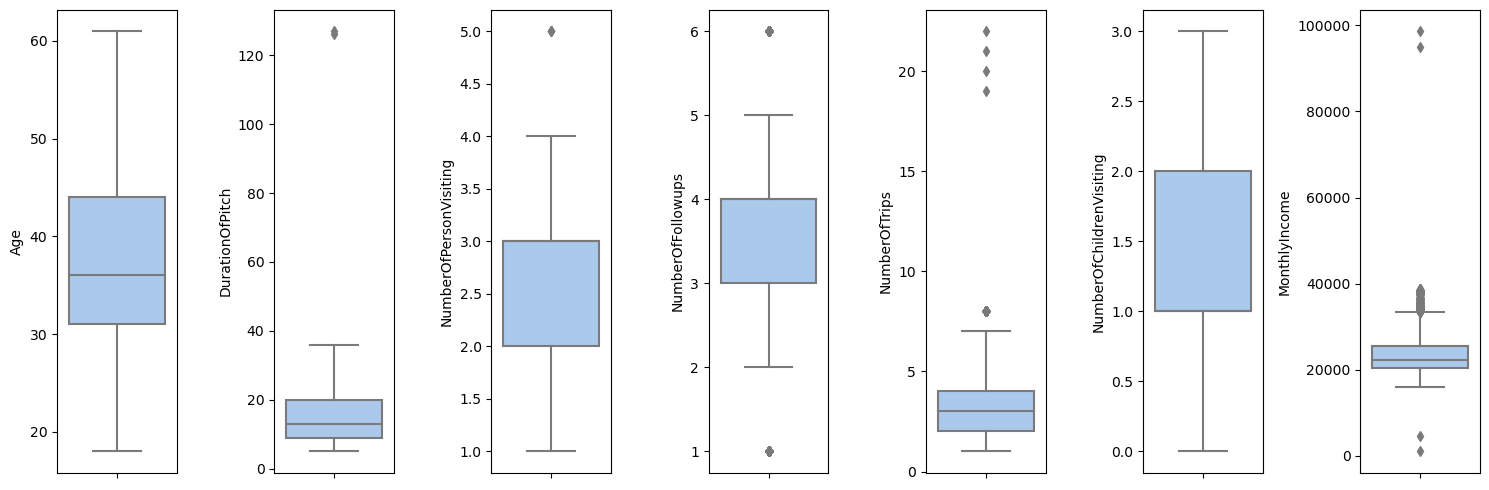

In [1051]:
plt.figure(figsize=(15,5))
for i in range(1, len(nums)):
    plt.subplot(1, 7, i)
    sns.boxplot(y=df[nums[i]],palette="pastel")
    plt.tight_layout()
plt.show()

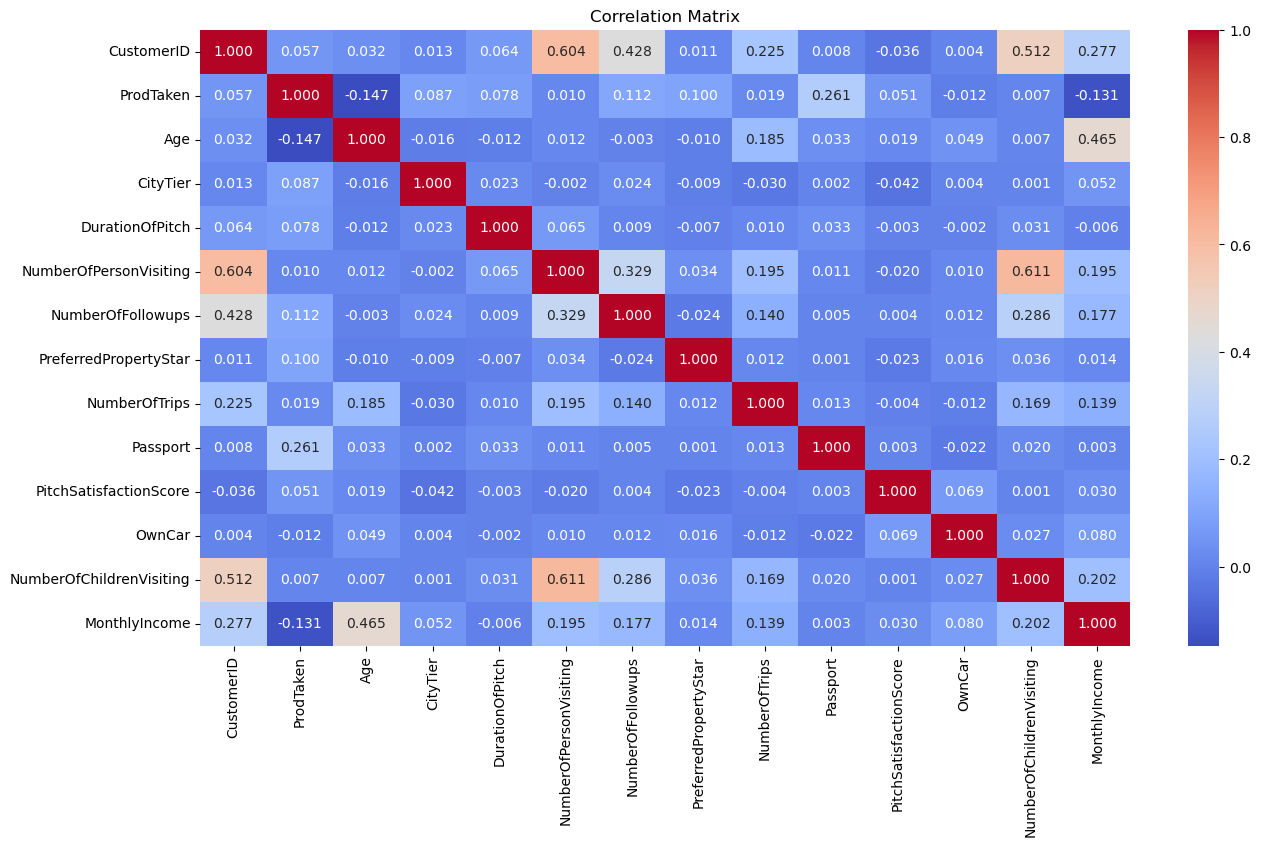

In [1054]:
plt.figure(figsize=(15,8))
corr_matrix = df[num].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title("Correlation Matrix")
plt.show()

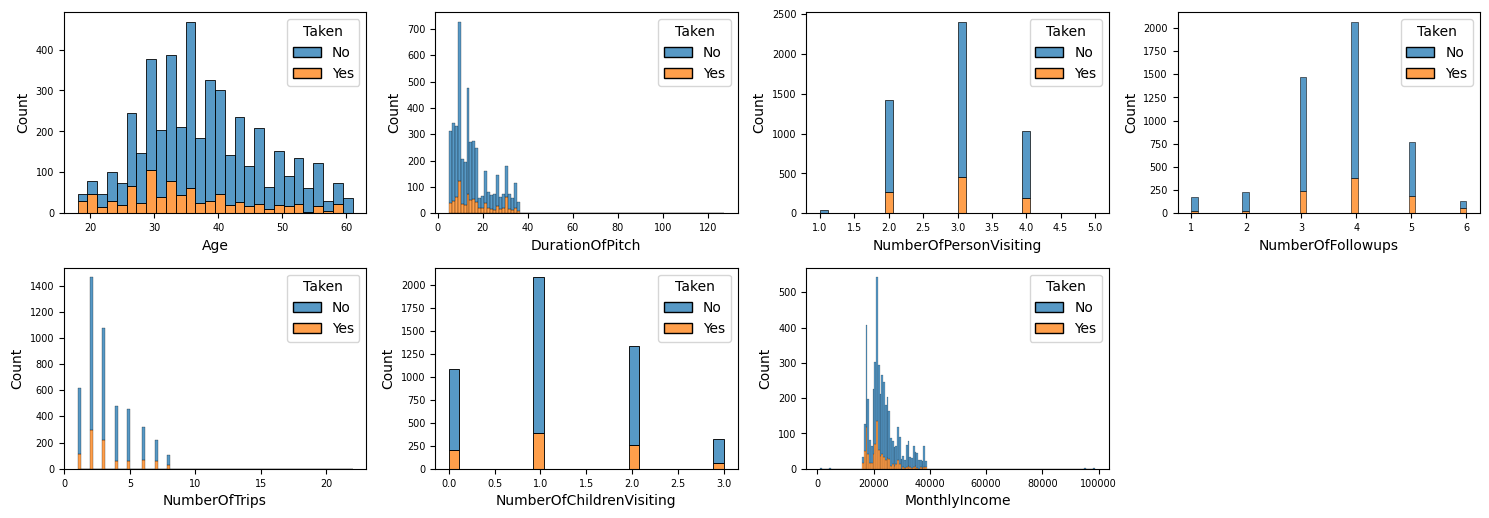

In [1056]:
plt.figure(figsize=(15,10))
for i, col in enumerate(nums[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)
    sns.histplot(data=df, x=col, hue='ProdTaken', multiple='stack')
    
    legend = plt.gca().get_legend()
    legend.set_title('Taken')
    legend.get_texts()[0].set_text('No')
    legend.get_texts()[1].set_text('Yes')

plt.tight_layout()

plt.show()

#### Distribution of the categorical data

In [1049]:
df[cats] = df[cats].astype('object')

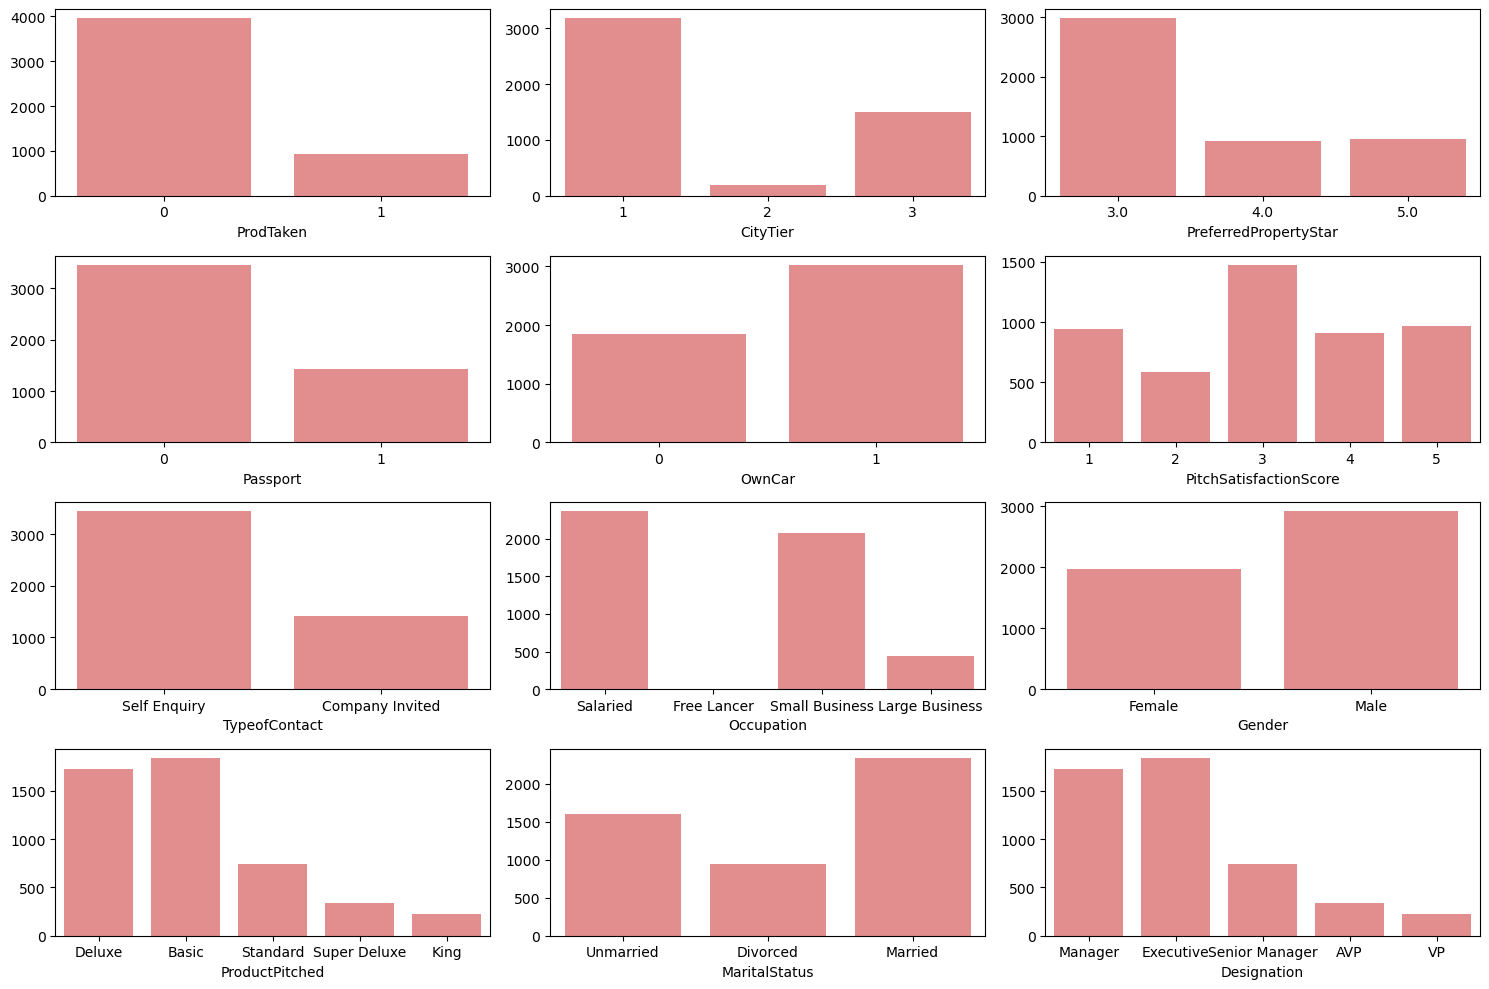

In [1052]:
plt.figure(figsize=(15,10))
for i, col in enumerate(cats):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[col],color="lightcoral")
    plt.ylabel('')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

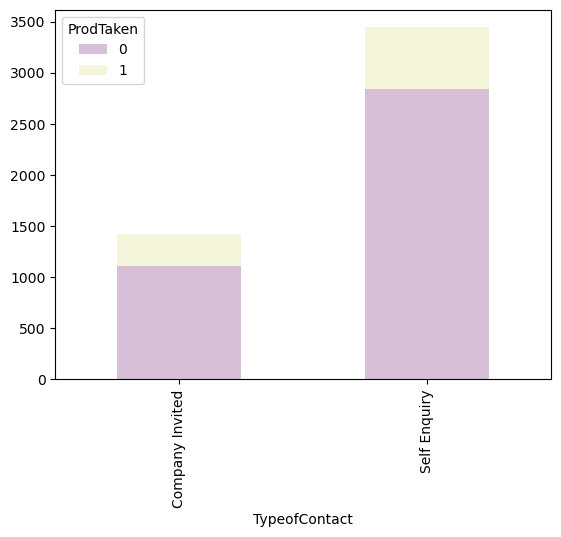

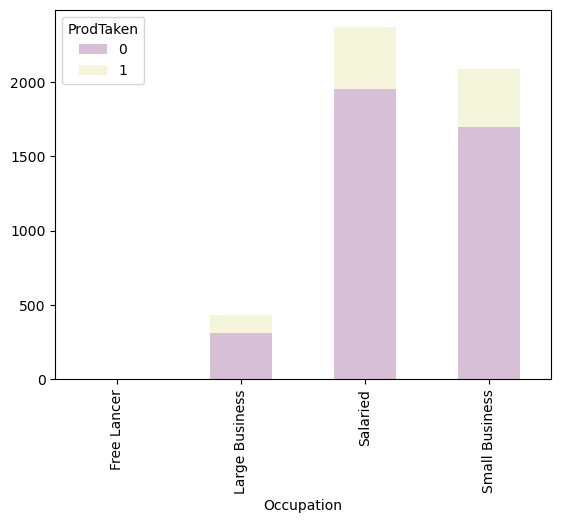

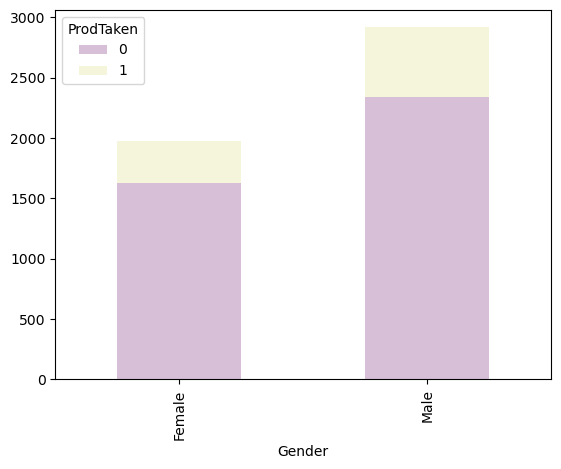

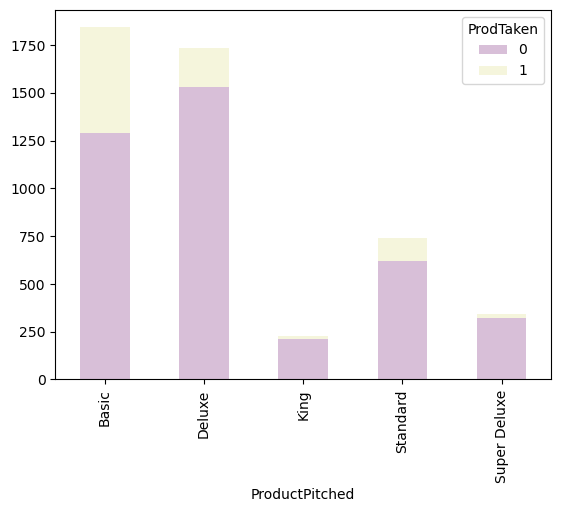

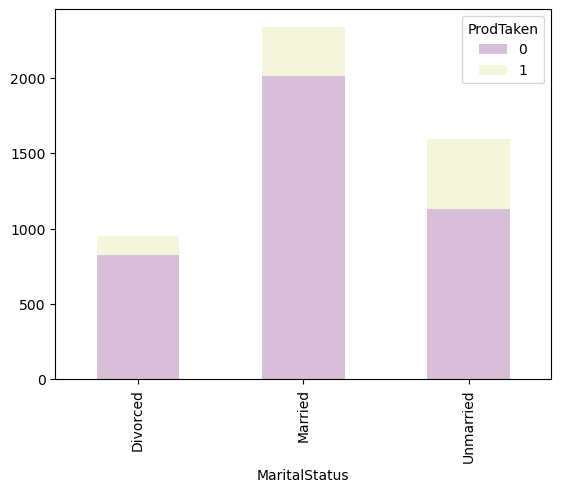

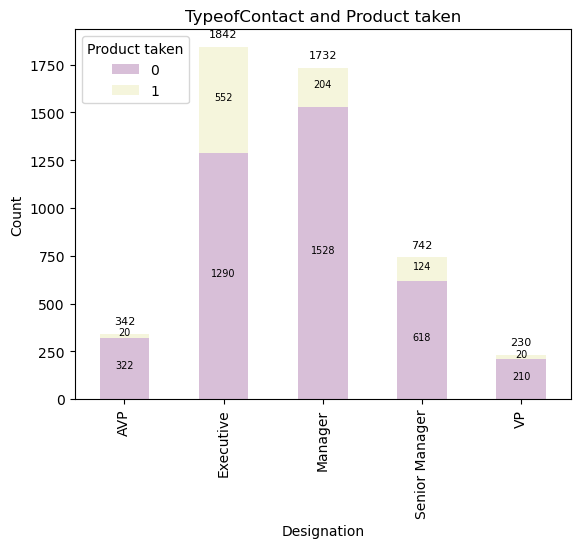

ProdTaken               0          1  Total
Designation                                
AVP             94.152047   5.847953  100.0
Executive       70.032573  29.967427  100.0
Manager         88.221709  11.778291  100.0
Senior Manager  83.288410  16.711590  100.0
VP              91.304348   8.695652  100.0


In [1053]:
# Group the DataFrame by TypeofContact and ProdTaken, and count occurrences
for i in cat:
    grouped = df.groupby([i, 'ProdTaken']).size().unstack()
    colors = ['thistle', 'beige']
    ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 50, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Count')
ax.set_title('TypeofContact and Product taken')
ax.legend(title = 'Product taken', loc = 'upper left')
plt.show()
print(percentage_grouped)

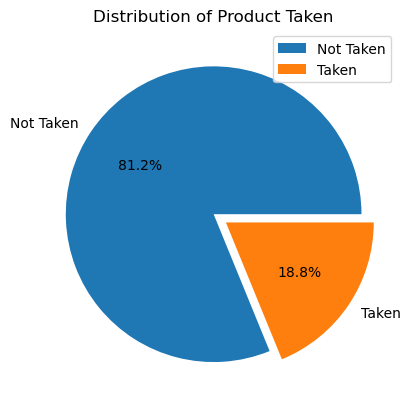

In [1055]:
labels=['Not Taken','Taken']
explode = [0,0.1]
plt.pie(df['ProdTaken'].value_counts().values, labels=labels, autopct='%.1f%%', explode=explode)
plt.title("Distribution of Product Taken")
plt.legend()
plt.show()


In [1057]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [1058]:
## Check Misssing Values
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [1059]:
# statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [1060]:
#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

In [1061]:
# create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [1062]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [1063]:
df.shape

(4888, 19)

In [1064]:
df.drop(['CustomerID'],axis=1, inplace=True)

##  Train test split followed by Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [1065]:
from sklearn.model_selection import train_test_split

In [1066]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [1067]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [1068]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [1069]:
imputer1 = SimpleImputer(strategy='median')#for numerical variable
imputer2 = SimpleImputer(strategy='most_frequent')#for the categorical variable 

In [1070]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']),
    ('imputer2',imputer2,['TypeofContact','NumberOfFollowups','PreferredPropertyStar'])
],remainder='passthrough')

In [1071]:
# Fit and transform the training set
X_train_transformed = trf.fit_transform(X_train)

# Transform the test set
X_test_transformed = trf.transform(X_test)

# Manually reconstruct the column names
# For imputer1 and imputer2 (we assume the imputers retain the same number of columns)
numerical_columns = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
categorical_columns = ['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar']
# The remaining columns are passed through as they are, so we need to append them too
remaining_columns = [col for col in X_train.columns if col not in numerical_columns + categorical_columns]

# New column names
new_columns = numerical_columns + categorical_columns + remaining_columns

# Convert the transformed array back to a DataFrame and assign the correct column names
X_train_df = pd.DataFrame(X_train_transformed, columns=new_columns)
X_test_df = pd.DataFrame(X_test_transformed, columns=new_columns)

# Display the resulting DataFrame with correct column names
print(X_train_df.head())

    Age DurationOfPitch NumberOfTrips MonthlyIncome    TypeofContact  \
0  36.0             7.0           3.0       21537.0     Self Enquiry   
1  42.0            21.0           6.0       21129.0     Self Enquiry   
2  50.0             7.0           4.0       22258.0     Self Enquiry   
3  38.0             7.0           3.0       24671.0     Self Enquiry   
4  44.0            35.0           6.0       23417.0  Company Invited   

  NumberOfFollowups PreferredPropertyStar CityTier      Occupation  Gender  \
0               5.0                   3.0        1  Small Business    Male   
1               4.0                   3.0        1        Salaried    Male   
2               4.0                   5.0        1  Large Business  Female   
3               5.0                   3.0        1        Salaried    Male   
4               2.0                   3.0        1  Small Business  Female   

  ProductPitched MaritalStatus Passport PitchSatisfactionScore OwnCar  \
0          Basic     Unma

In [1072]:
X_train_df

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,TypeofContact,NumberOfFollowups,PreferredPropertyStar,CityTier,Occupation,Gender,ProductPitched,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,Designation,TotalVisiting
0,36.0,7.0,3.0,21537.0,Self Enquiry,5.0,3.0,1,Small Business,Male,Basic,Unmarried,0,4,1,Executive,3.0
1,42.0,21.0,6.0,21129.0,Self Enquiry,4.0,3.0,1,Salaried,Male,Basic,Married,0,4,1,Executive,5.0
2,50.0,7.0,4.0,22258.0,Self Enquiry,4.0,5.0,1,Large Business,Female,Basic,Divorced,0,4,1,Executive,4.0
3,38.0,7.0,3.0,24671.0,Self Enquiry,5.0,3.0,1,Salaried,Male,Deluxe,Married,0,5,0,Manager,4.0
4,44.0,35.0,6.0,23417.0,Company Invited,2.0,3.0,1,Small Business,Female,Basic,Unmarried,0,3,0,Executive,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,28.0,10.0,2.0,20723.0,Self Enquiry,5.0,3.0,1,Small Business,Male,Basic,Unmarried,0,1,1,Executive,5.0
3906,41.0,8.0,1.0,31595.0,Self Enquiry,3.0,5.0,3,Salaried,Female,Super Deluxe,Divorced,0,5,1,AVP,4.0
3907,38.0,28.0,7.0,21651.0,Company Invited,4.0,3.0,3,Small Business,Female,Basic,Divorced,0,2,1,Executive,5.0
3908,28.0,30.0,3.0,22218.0,Self Enquiry,5.0,3.0,3,Small Business,Female,Deluxe,Married,0,1,1,Manager,5.0


In [1073]:
X_test_df

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,TypeofContact,NumberOfFollowups,PreferredPropertyStar,CityTier,Occupation,Gender,ProductPitched,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,Designation,TotalVisiting
0,32.0,13.0,1.0,19668.0,Company Invited,5.0,3.0,3,Small Business,Male,Deluxe,Married,0,2,0,Manager,3.0
1,46.0,11.0,1.0,20021.0,Self Enquiry,4.0,4.0,2,Small Business,Male,Deluxe,Married,1,5,0,Manager,4.0
2,37.0,22.0,5.0,21334.0,Self Enquiry,4.0,3.0,3,Small Business,Male,Deluxe,Married,0,5,1,Manager,3.0
3,43.0,36.0,6.0,22950.0,Self Enquiry,6.0,3.0,1,Small Business,Male,Deluxe,Unmarried,0,3,1,Manager,5.0
4,25.0,7.0,3.0,21880.0,Self Enquiry,4.0,4.0,3,Large Business,Female,Basic,Unmarried,1,4,1,Executive,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,38.0,7.0,6.0,26169.0,Self Enquiry,4.0,3.0,1,Large Business,Female,Standard,Unmarried,0,5,1,Senior Manager,5.0
974,29.0,6.0,2.0,17319.0,Self Enquiry,4.0,5.0,1,Salaried,Female,Basic,Married,1,1,0,Executive,2.0
975,35.0,24.0,2.0,27178.0,Company Invited,5.0,3.0,1,Large Business,Male,Basic,Married,1,5,1,Executive,5.0
976,26.0,13.0,2.0,22314.0,Self Enquiry,1.0,3.0,1,Small Business,Male,Basic,Divorced,0,5,1,Executive,3.0


In [1074]:
# trf.named_transformers_['imputer1'].statistics_

In [1075]:
# a=df[['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']].median()
# print(a)

In [1076]:
X_train_df.shape

(3910, 17)

In [1077]:
X_test_df.shape

(978, 17)

In [1078]:
y_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: object

In [1079]:
y_test

144     0
79      0
2098    0
4738    0
2858    1
       ..
2908    0
2059    1
4872    1
843     0
2572    0
Name: ProdTaken, Length: 978, dtype: object

In [1080]:
X_train_df.shape,X_test_df.shape

((3910, 17), (978, 17))

In [1081]:
X_test_df.isnull().sum()

Age                       0
DurationOfPitch           0
NumberOfTrips             0
MonthlyIncome             0
TypeofContact             0
NumberOfFollowups         0
PreferredPropertyStar     0
CityTier                  0
Occupation                0
Gender                    0
ProductPitched            0
MaritalStatus             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
TotalVisiting             0
dtype: int64

In [1082]:
X = pd.concat([X_train_df, X_test_df], axis=0)

In [1083]:
X.head()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,TypeofContact,NumberOfFollowups,PreferredPropertyStar,CityTier,Occupation,Gender,ProductPitched,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,Designation,TotalVisiting
0,36.0,7.0,3.0,21537.0,Self Enquiry,5.0,3.0,1,Small Business,Male,Basic,Unmarried,0,4,1,Executive,3.0
1,42.0,21.0,6.0,21129.0,Self Enquiry,4.0,3.0,1,Salaried,Male,Basic,Married,0,4,1,Executive,5.0
2,50.0,7.0,4.0,22258.0,Self Enquiry,4.0,5.0,1,Large Business,Female,Basic,Divorced,0,4,1,Executive,4.0
3,38.0,7.0,3.0,24671.0,Self Enquiry,5.0,3.0,1,Salaried,Male,Deluxe,Married,0,5,0,Manager,4.0
4,44.0,35.0,6.0,23417.0,Company Invited,2.0,3.0,1,Small Business,Female,Basic,Unmarried,0,3,0,Executive,7.0


In [1084]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4888 entries, 0 to 977
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4888 non-null   object
 1   DurationOfPitch         4888 non-null   object
 2   NumberOfTrips           4888 non-null   object
 3   MonthlyIncome           4888 non-null   object
 4   TypeofContact           4888 non-null   object
 5   NumberOfFollowups       4888 non-null   object
 6   PreferredPropertyStar   4888 non-null   object
 7   CityTier                4888 non-null   object
 8   Occupation              4888 non-null   object
 9   Gender                  4888 non-null   object
 10  ProductPitched          4888 non-null   object
 11  MaritalStatus           4888 non-null   object
 12  Passport                4888 non-null   object
 13  PitchSatisfactionScore  4888 non-null   object
 14  OwnCar                  4888 non-null   object
 15  Designatio

In [1085]:
dtype_mapping = {
    
    'Age': 'float64',
    'TypeofContact': 'object',
    'CityTier': 'int64',
    'DurationOfPitch': 'object',
    'Occupation': 'object',
    'Gender': 'object',
    'NumberOfFollowups': 'float64',
    'ProductPitched': 'object',
    'PreferredPropertyStar': 'object',
    'MaritalStatus': 'object',
    'NumberOfTrips': 'float64',
    'Passport': 'object',
    'PitchSatisfactionScore': 'int64',
    'OwnCar': 'int64',
    'Designation': 'object',
    'MonthlyIncome': 'float64',
    'TotalVisiting':'float64'
}

# Convert columns to respective data types
X = X.astype(dtype_mapping)

# Verify the changes
print(X.dtypes)


Age                       float64
DurationOfPitch            object
NumberOfTrips             float64
MonthlyIncome             float64
TypeofContact              object
NumberOfFollowups         float64
PreferredPropertyStar      object
CityTier                    int64
Occupation                 object
Gender                     object
ProductPitched             object
MaritalStatus              object
Passport                   object
PitchSatisfactionScore      int64
OwnCar                      int64
Designation                object
TotalVisiting             float64
dtype: object


In [1086]:
X=pd.DataFrame(X)

In [1087]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first',handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [1088]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['DurationOfPitch', 'TypeofContact', 'PreferredPropertyStar',
       'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Passport',
       'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfFollowups',
       'CityTier', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisiting'],
      dtype='object'))])

In [1089]:
X.head()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,TypeofContact,NumberOfFollowups,PreferredPropertyStar,CityTier,Occupation,Gender,ProductPitched,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,Designation,TotalVisiting
0,36.0,7.0,3.0,21537.0,Self Enquiry,5.0,3.0,1,Small Business,Male,Basic,Unmarried,0,4,1,Executive,3.0
1,42.0,21.0,6.0,21129.0,Self Enquiry,4.0,3.0,1,Salaried,Male,Basic,Married,0,4,1,Executive,5.0
2,50.0,7.0,4.0,22258.0,Self Enquiry,4.0,5.0,1,Large Business,Female,Basic,Divorced,0,4,1,Executive,4.0
3,38.0,7.0,3.0,24671.0,Self Enquiry,5.0,3.0,1,Salaried,Male,Deluxe,Married,0,5,0,Manager,4.0
4,44.0,35.0,6.0,23417.0,Company Invited,2.0,3.0,1,Small Business,Female,Basic,Unmarried,0,3,0,Executive,7.0


In [1090]:
X_train_df.head()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,TypeofContact,NumberOfFollowups,PreferredPropertyStar,CityTier,Occupation,Gender,ProductPitched,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,Designation,TotalVisiting
0,36.0,7.0,3.0,21537.0,Self Enquiry,5.0,3.0,1,Small Business,Male,Basic,Unmarried,0,4,1,Executive,3.0
1,42.0,21.0,6.0,21129.0,Self Enquiry,4.0,3.0,1,Salaried,Male,Basic,Married,0,4,1,Executive,5.0
2,50.0,7.0,4.0,22258.0,Self Enquiry,4.0,5.0,1,Large Business,Female,Basic,Divorced,0,4,1,Executive,4.0
3,38.0,7.0,3.0,24671.0,Self Enquiry,5.0,3.0,1,Salaried,Male,Deluxe,Married,0,5,0,Manager,4.0
4,44.0,35.0,6.0,23417.0,Company Invited,2.0,3.0,1,Small Business,Female,Basic,Unmarried,0,3,0,Executive,7.0


In [1091]:
## applying Trnsformation in training(fit_transform)
X_train_df=preprocessor.fit_transform(X_train_df)

In [1092]:
X_train_df=pd.DataFrame(X_train_df.toarray())

In [1093]:
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.157926,-0.127737,-0.381919,1.284279,-0.721400,0.679690,0.782966,-0.774151
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.508072,1.511598,-0.459467,0.282777,-0.721400,0.679690,0.782966,0.643615
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.396069,0.418708,-0.244879,0.282777,-0.721400,0.679690,0.782966,-0.065268
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.064073,-0.127737,0.213760,1.284279,-0.721400,1.408395,-1.277194,-0.065268
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.730071,1.511598,-0.024588,-1.720227,-0.721400,-0.049015,-1.277194,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.045924,-0.674182,-0.536636,1.284279,-0.721400,-1.506426,0.782966,0.643615
3906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.397072,-1.220627,1.529803,-0.718725,1.455047,1.408395,0.782966,-0.065268
3907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.064073,2.058043,-0.360251,0.282777,1.455047,-0.777720,0.782966,0.643615
3908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.045924,-0.127737,-0.252481,1.284279,1.455047,-1.506426,0.782966,0.643615


In [1094]:
X_train_df.shape

(3910, 58)

In [1095]:
## apply tansformation on test(transform)
X_test_df=preprocessor.transform(X_test_df)

In [1096]:
X_test_df=pd.DataFrame(X_test_df.toarray())

## XgboostBoost Classifier Training
#### We can also combine multiple algorithms


In [1097]:
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.157926,-0.127737,-0.381919,1.284279,-0.721400,0.679690,0.782966,-0.774151
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.508072,1.511598,-0.459467,0.282777,-0.721400,0.679690,0.782966,0.643615
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.396069,0.418708,-0.244879,0.282777,-0.721400,0.679690,0.782966,-0.065268
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.064073,-0.127737,0.213760,1.284279,-0.721400,1.408395,-1.277194,-0.065268
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.730071,1.511598,-0.024588,-1.720227,-0.721400,-0.049015,-1.277194,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.045924,-0.674182,-0.536636,1.284279,-0.721400,-1.506426,0.782966,0.643615
3906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.397072,-1.220627,1.529803,-0.718725,1.455047,1.408395,0.782966,-0.065268
3907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.064073,2.058043,-0.360251,0.282777,1.455047,-0.777720,0.782966,0.643615
3908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.045924,-0.127737,-0.252481,1.284279,1.455047,-1.506426,0.782966,0.643615


In [1098]:
y_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: object

In [1099]:
!pip install xgboost

In [1100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [1105]:
y_train.astype('int')

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: int64

In [1108]:
# Check and encode the target if necessary
from sklearn.preprocessing import LabelEncoder
if y_train.dtype == 'O':  # Target is an object type
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)


In [1109]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_df, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_df)
    y_test_pred = model.predict(X_test_df)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8468
- F1 score: 0.8223
- Precision: 0.6982
- Recall: 0.3141
- Roc Auc Score: 0.6415
----------------------------------
Model performance for Test set
- Accuracy: 0.8395
- F1 score: 0.8141
- Precision: 0.6977
- Recall: 0.3141
- Roc Auc Score: 0.6405


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9162
- F1 score: 0.9160
- Precision: 0.7884
- Recall: 0.7801
- Roc Auc Score: 0.8646


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9151
- F1 score: 0.9073
- Precision: 0.9500
- Recall: 0.5969
- Roc Auc Score: 0.7946


Gradient Boost
Model performance for Training se

In [1120]:
## Hyperparameter Training
dt_param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['None','sqrt','log2']}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}
adaboost_param={"n_estimators":[50,60,70,80,90],
                "algorithm":['SAMME','SAMME.R']}
gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10]}

In [1121]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [1122]:
xgboost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

In [1123]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("DecisionTree",DecisionTreeClassifier(),dt_param),
    ("RF", RandomForestClassifier(), rf_params),
    ("Xgboost", XGBClassifier(), xgboost_params),("AB", AdaBoostClassifier(), adaboost_param),\
    ("GradientBoost", GradientBoostingClassifier(), gradient_params)
                   
                   ]

In [1114]:
randomcv_models

[('DecisionTree',
  DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy', 'log_loss'],
   'splitter': ['best', 'random'],
   'max_depth': [1, 2, 3, 4, 5],
   'max_features': ['auto', 'sqrt', 'log2']}),
 ('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
             

In [1124]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_df, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new 

/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Users/aditi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new 

---------------- Best Params for DecisionTree -------------------
{'splitter': 'best', 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for Xgboost -------------------
{'n_estimators': 300, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
---------------- Best Params for AB -------------------
{'n_estimators': 60, 'algorithm': 'SAMME'}
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 200, 'min_samples_split': 15, 'max_depth': None, 'loss': 'exponential', 'criterion': 'friedman_mse'}


In [1128]:
from math import sqrt

In [1132]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    "Xgboost":XGBClassifier(n_estimators=200,max_depth=12,learning_rate=0.1,
                           colsample_bytree=1)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_df, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_df)
    y_test_pred = model.predict(X_test_df)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9172
- F1 score: 0.9089
- Precision: 0.9741
- Recall: 0.5916
- Roc Auc Score: 0.7939


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9305
- F1 score: 0.9273
- Precision: 0.9073
- Recall: 0.7173
- Roc Auc Score: 0.8497




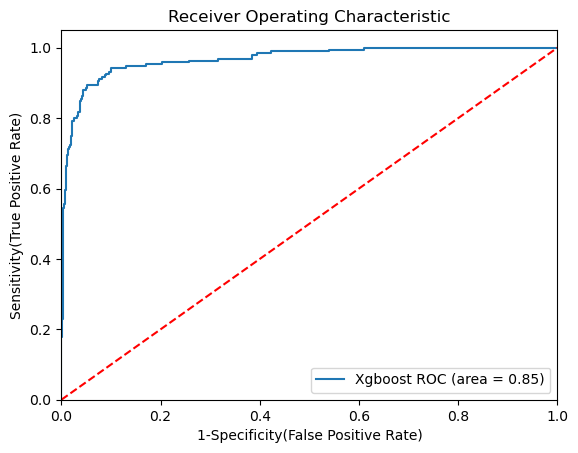

In [1134]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Xgboost',
    'model':XGBClassifier(n_estimators=200,max_depth=12,learning_rate=0.1,
                           colsample_bytree=1),
    'auc':  0.8497
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train_df, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_df)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 